In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import files


In [3]:
# Load the Dataset

uploaded = files.upload()


Saving 201801-fordgobike-tripdata.csv to 201801-fordgobike-tripdata.csv


In [4]:
# Show first few rows

df = pd.read_csv('201801-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,52:35.2,47:19.8,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,13:34.4,57:17.3,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,23:55.9,16:52.1,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,53:23.6,51:20.5,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,52:24.7,58:31.1,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# Dataset Columns and Rows Count
print("Rows: " , df.shape[0])
print("Columns: " , df.shape[1])

Rows:  94802
Columns:  16


In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

<ipython-input-7-c6edc972e5e4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
<ipython-input-7-c6edc972e5e4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               38270 non-null  datetime64[ns]
 2   end_time                 38022 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type                94802 n

In [9]:
# Check for missing values

missing_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': df.isnull().mean() * 100
}).sort_values(by='Missing Values', ascending=False)

print(missing_df[missing_df['Missing Values'] > 0])

                   Missing Values  Percentage (%)
end_time                    56780       59.893251
start_time                  56532       59.631653
member_birth_year            7839        8.268813
member_gender                7801        8.228729


In [10]:
# Handling Missing Values

df = df.dropna(subset=['start_time', 'end_time', 'member_gender', 'member_birth_year'])

In [11]:
print(df.isnull().sum())

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Add New Columns

df['trip_duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60
df['start_hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_minutes,start_hour,day_of_week,start_month
2,71576,2025-04-24 23:55:54,2025-04-24 16:52:06,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,-423.8,23,Thursday,April
19,686,2025-04-24 07:15:18,2025-04-24 18:41:36,312,San Jose Diridon Station,37.329732,-121.901782,317,San Salvador St at 9th St,37.333955,-121.877349,1886,Subscriber,1997.0,Female,No,686.3,7,Thursday,April
20,450,2025-04-24 07:13:06,2025-04-24 14:43:48,241,Ashby BART Station,37.852477,-122.270213,157,65th St at Hollis St,37.846784,-122.291376,3583,Subscriber,1994.0,Male,No,450.7,7,Thursday,April
21,294,2025-04-24 08:12:00,2025-04-24 13:06:36,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,244,Shattuck Ave at Hearst Ave,37.873792,-122.268618,2144,Subscriber,1983.0,Male,No,294.6,8,Thursday,April
22,150,2025-04-24 10:09:36,2025-04-24 12:40:18,182,19th Street BART Station,37.809013,-122.268247,183,Telegraph Ave at 19th St,37.808702,-122.269927,3468,Subscriber,1945.0,Male,Yes,150.7,10,Thursday,April


# **UNIVARIATE ANALYSIS**

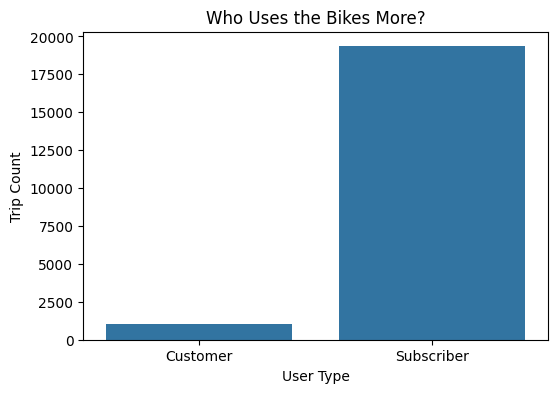

In [43]:
# 1. Trip Count by User Type (Bar Chart)

plt.figure(figsize=(6,4))
sns.countplot(data = df , x = 'user_type')
plt.title('Who Uses the Bikes More?')
plt.xlabel('User Type')
plt.ylabel('Trip Count')
plt.show()


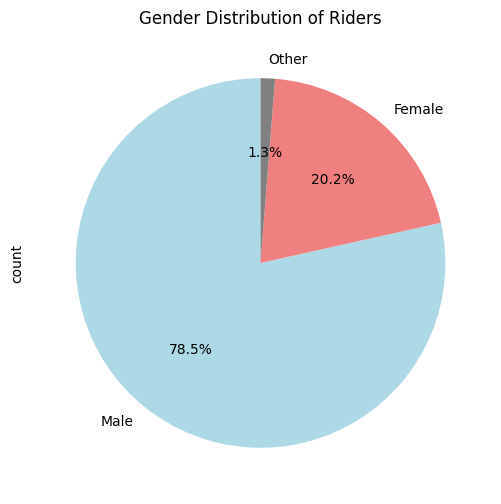

In [60]:
# 2. Gender Distribution

df['member_gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'grey'], figsize=(6,6))
plt.title('Gender Distribution of Riders')
plt.show()



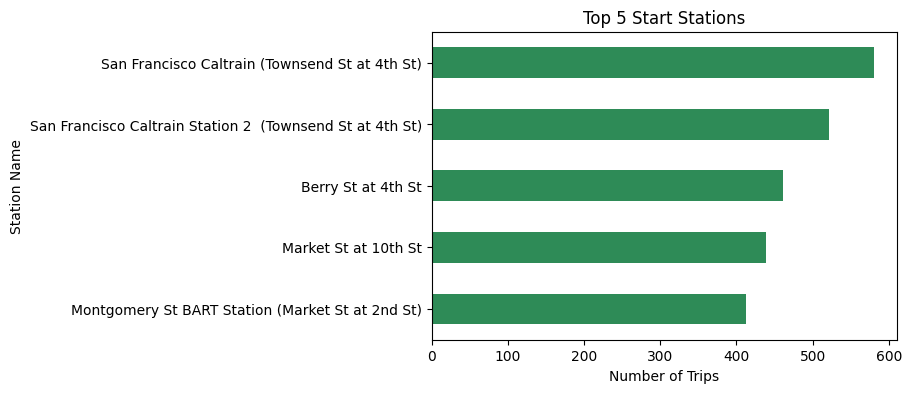

In [68]:
# 3. Top 5 Start Stations

plt.figure(figsize=(6,4))
top_starts = df['start_station_name'].value_counts().head(5)
top_starts.sort_values().plot(kind='barh', color='seagreen')
plt.title('Top 5 Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')
plt.show()



# **BIVARIATE ANALYSIS**

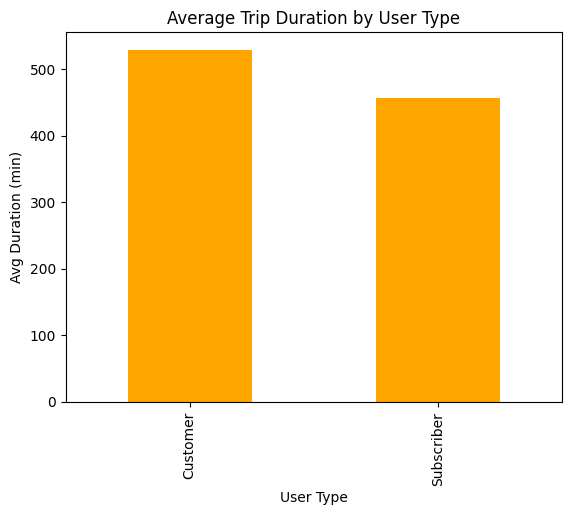

In [63]:
# 1. Average Trip Duration by User Type

avg_duration = df.groupby('user_type')['trip_duration_minutes'].mean().sort_values()
avg_duration.plot(kind='barh', color='orange')
plt.title('Average Trip Duration by User Type')
plt.xlabel('Avg Duration (min)')
plt.ylabel('User Type')
plt.show()


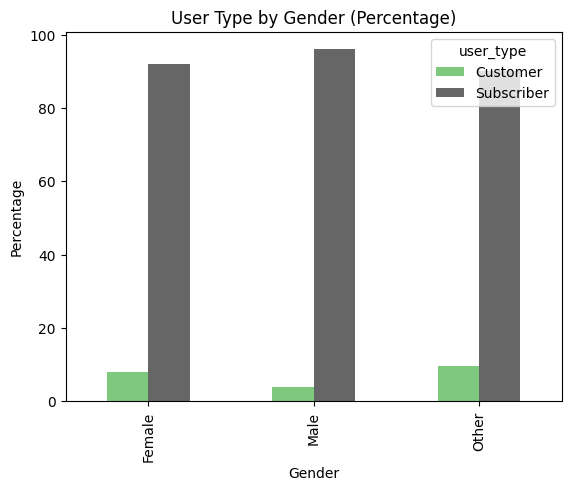

In [71]:
# 2 .Gender vs User Type

gender_user = pd.crosstab(df['member_gender'], df['user_type'], normalize='index') * 100
gender_user.plot(kind='bar', stacked=False, colormap='Accent')
plt.title('User Type by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

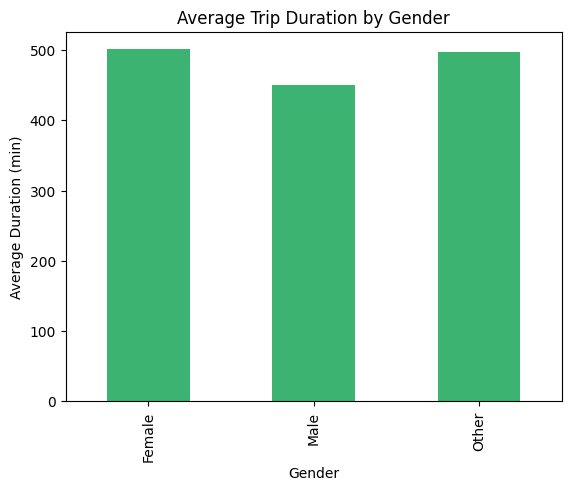

In [82]:
# 3. Average Trip Duration by Gender

avg_by_gender = df.groupby('member_gender')['trip_duration_minutes'].mean()
avg_by_gender.plot(kind='bar', color='mediumseagreen')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (min)')
plt.show()


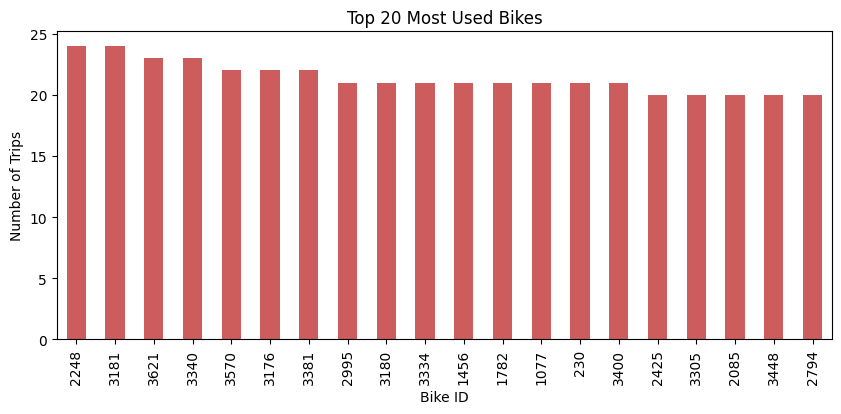

In [88]:
# 4 . Trip Count by Bike ID (Top 20 Bikes)

top_bikes = df['bike_id'].value_counts().head(20)

plt.figure(figsize=(10,4))
top_bikes.plot(kind='bar', color='indianred')
plt.title('Top 20 Most Used Bikes')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()


# **MULTIVARIATE ANALYSIS**

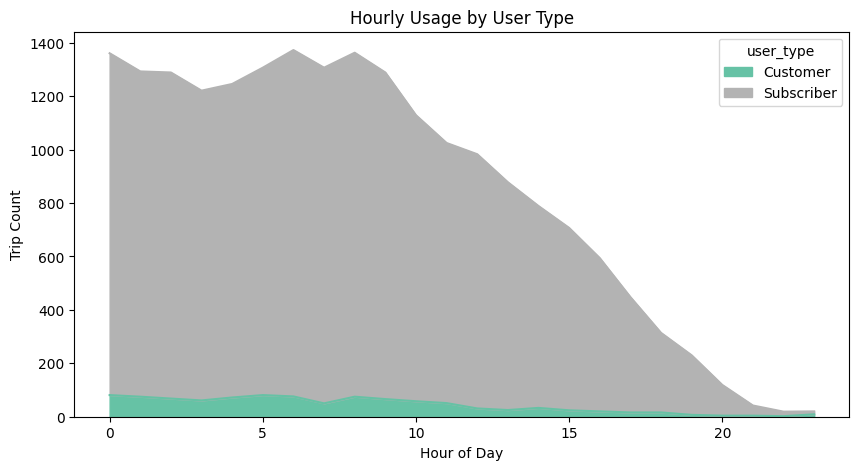

In [76]:
# 1. Hourly Usage by User Type (Grouped Bar)

user_hour = df.groupby(['start_hour', 'user_type']).size().unstack()
user_hour.plot(kind='area', stacked=True, figsize=(10,5), colormap='Set2')
plt.title('Hourly Usage by User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.show()

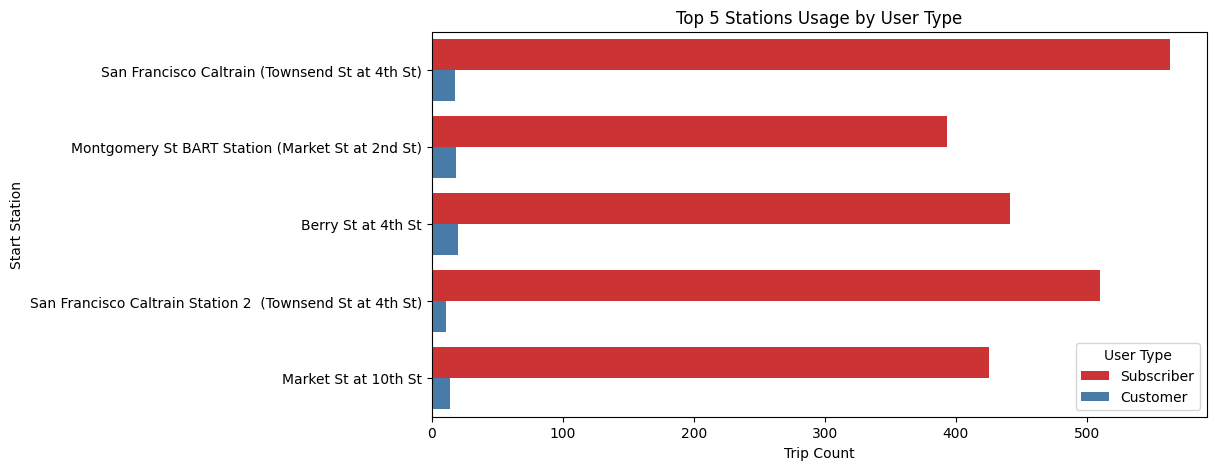

In [89]:
# 2. Trips by Start Station, Colored by User Type (Horizontal Bar)

top_stations = df['start_station_name'].value_counts().head(5).index
filtered = df[df['start_station_name'].isin(top_stations)]

plt.figure(figsize=(10,5))
sns.countplot(data=filtered, y='start_station_name', hue='user_type', palette='Set1')
plt.title('Top 5 Stations Usage by User Type')
plt.xlabel('Trip Count')
plt.ylabel('Start Station')
plt.legend(title='User Type')
plt.show()


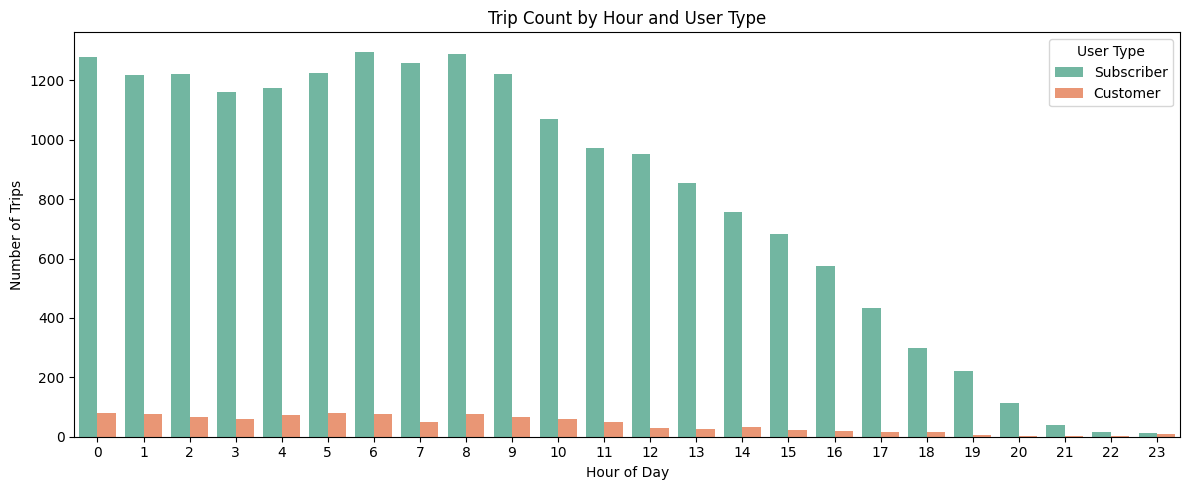

In [96]:
# 3.Trip Count by Start Hour and User Type (Grouped Column Chart)

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='start_hour', hue='user_type', palette='Set2')
plt.title('Trip Count by Hour and User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()



# **Questions to be answered:**

1. How long does the average trip take?

In [116]:
# Average trip duration

average_trip_duration = df['trip_duration_minutes'].mean()
print(f"The average trip duration is {average_trip_duration:.2f} minutes.")

The average trip duration is 460.67 minutes.


2. Is the trip duration affected by weather(months/seasons)

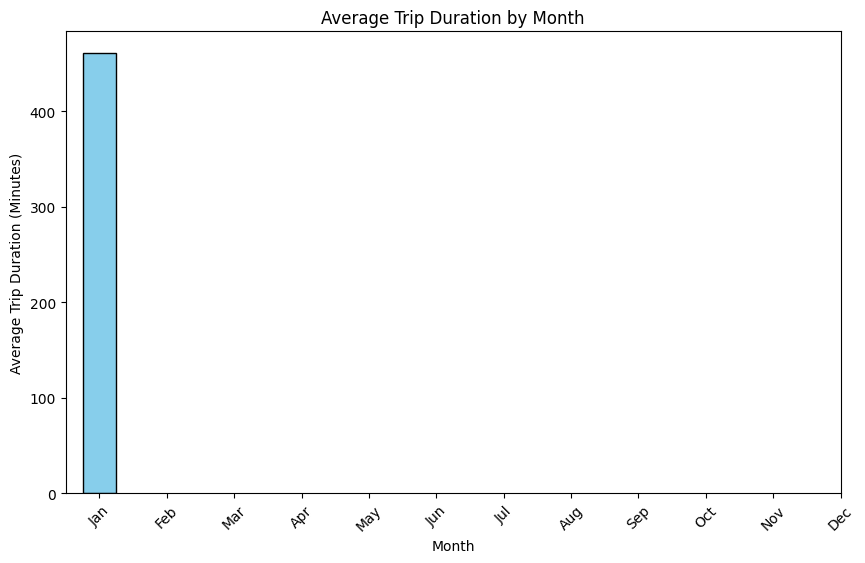

In [117]:
# Extract month from 'start_time' column
df['month'] = df['start_time'].dt.month

# Average trip duration for each month
monthly_avg_duration = df.groupby('month')['trip_duration_minutes'].mean()

# Plotting the monthly average trip duration
plt.figure(figsize=(10, 6))
monthly_avg_duration.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (Minutes)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()


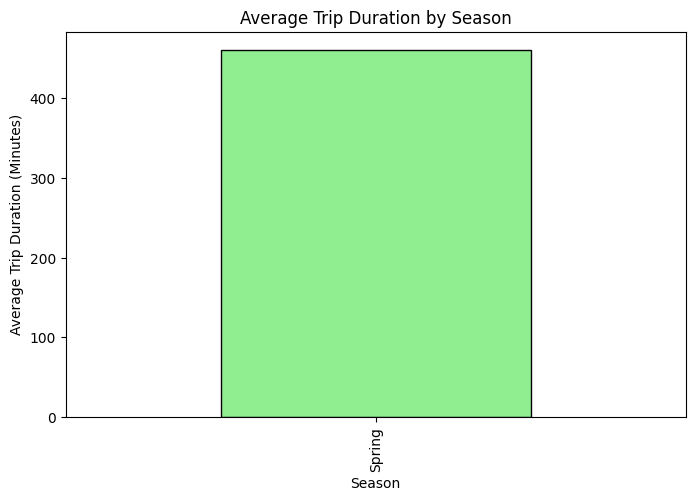

In [119]:
# Seasons based on months
season_dict = {12: 'Winter', 1: 'Winter', 2: 'Winter',
               3: 'Spring', 4: 'Spring', 5: 'Spring',
               6: 'Summer', 7: 'Summer', 8: 'Summer',
               9: 'Fall', 10: 'Fall', 11: 'Fall'}

df['season'] = df['month'].map(season_dict)

# Average trip duration for each season
seasonal_avg_duration = df.groupby('season')['trip_duration_minutes'].mean()

# Plotting the seasonal average trip duration
plt.figure(figsize=(8, 5))
seasonal_avg_duration.plot(kind='bar', color='lightgreen', edgecolor='black')

# Adding titles and labels
plt.title('Average Trip Duration by Season')
plt.xlabel('Season')
plt.ylabel('Average Trip Duration (Minutes)')

plt.show()
